# Testing DESIGNR's circuit scoring and toxicity scoring

In [1]:
import pandas as pd
import json
from dgd.utils.utils5 import *
from itertools import cycle
import matplotlib.cm as cm
import os
import networkx as nx
import pydot
import matplotlib.pyplot as plt
#import pygraphviz as pgv
import json5 as json  # Import json5 instead of json
import re

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2200862/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
input_signals_list_small_molecules_3_input = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
    {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
    {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
    {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
    {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
    {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
]    

input_signals_list_binary_3_input = [
    {0: 0, 1: 0, 2: 0},  # First set of input signals
    {0: 0, 1: 0, 2: 1},  # Second set of input signals
    {0: 0, 1: 1, 2: 0},  # Third set of input signals
    {0: 0, 1: 1, 2: 1},  # First set of input signals
    {0: 1, 1: 0, 2: 0},  # Second set of input signals
    {0: 1, 1: 0, 2: 1},  # Third set of input signals    
    {0: 1, 1: 1, 2: 0},  # Second set of input signals
    {0: 1, 1: 1, 2: 1},  # Third set of input signals  
]   

input_signals_list_small_molecules_4_input = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042, 3: 0.0694},  
    {0: 0.0278, 1: 0.0022, 2: 0.0042, 3: 1.1544},  
    {0: 0.0278, 1: 0.0022, 2: 2.0082, 3: 0.0694},  
    {0: 0.0278, 1: 0.0022, 2: 2.0082, 3: 1.1544}, 
    {0: 0.0278, 1: 5.0543, 2: 0.0042, 3: 0.0694},  
    {0: 0.0278, 1: 5.0543, 2: 0.0042, 3: 1.1544},  
    {0: 0.0278, 1: 5.0543, 2: 2.0082, 3: 0.0694},  
    {0: 0.0278, 1: 5.0543, 2: 2.0082, 3: 1.1544},   
    {0: 3.9239, 1: 0.0022, 2: 0.0042, 3: 0.0694}, 
    {0: 3.9239, 1: 0.0022, 2: 0.0042, 3: 1.1544},  
    {0: 3.9239, 1: 0.0022, 2: 2.0082, 3: 0.0694},  
    {0: 3.9239, 1: 0.0022, 2: 2.0082, 3: 1.1544},  
    {0: 3.9239, 1: 5.0543, 2: 0.0042, 3: 0.0694},  
    {0: 3.9239, 1: 5.0543, 2: 0.0042, 3: 1.1544},      
    {0: 3.9239, 1: 5.0543, 2: 2.0082, 3: 0.0694},  
    {0: 3.9239, 1: 5.0543, 2: 2.0082, 3: 1.1544},    
]    


input_signals_list_binary_4_input = [
    {0: 0, 1: 0, 2: 0, 3: 0},  
    {0: 0, 1: 0, 2: 0, 3: 1},  
    {0: 0, 1: 0, 2: 1, 3: 0}, 
    {0: 0, 1: 0, 2: 1, 3: 1}, 
    {0: 0, 1: 1, 2: 0, 3: 0},  
    {0: 0, 1: 1, 2: 0, 3: 1},    
    {0: 0, 1: 1, 2: 1, 3: 0},  
    {0: 0, 1: 1, 2: 1, 3: 1}, 
    {0: 1, 1: 0, 2: 0, 3: 0},  
    {0: 1, 1: 0, 2: 0, 3: 1},  
    {0: 1, 1: 0, 2: 1, 3: 0}, 
    {0: 1, 1: 0, 2: 1, 3: 1}, 
    {0: 1, 1: 1, 2: 0, 3: 0},  
    {0: 1, 1: 1, 2: 0, 3: 1},    
    {0: 1, 1: 1, 2: 1, 3: 0},  
    {0: 1, 1: 1, 2: 1, 3: 1},     
]   


# Data
repressor_data = {
    "Repressor": ["AmeR", "AmtR", "BetI", "BM3R1", "BM3R1", "BM3R1", "HlyIIR", "IcaRA", "LitR", "LmrA", 
                  "PhlF", "PhlF", "PhlF", "PsrA", "QacR", "QacR", "SrpR", "SrpR", "SrpR", "SrpR"],
    "RBS": ["F1", "A1", "E1", "B1", "B2", "B3", "H1", "I1", "L1", "N1", 
            "P1", "P2", "P3", "R1", "Q1", "Q2", "S1", "S2", "S3", "S4"],
    "ymaxa": [3.835, 5.036, 3.065, 0.543, 0.822, 0.704, 2.462, 3.558, 4.296, 2.152,
              3.901, 6.505, 6.794, 6.489, 3.744, 3.778, 1.216, 2.556, 2.547, 3.314],
    "ymina": [1.06, 0.091, 1e-14, 0.002, 1e-14, 1e-14, 0.057, 1e-14, 0.074, 0.183,
              0.01, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14],
    "Ka": [0.122, 0.022, 0.363, 0.051, 0.285, 0.261, 1e-14, 0.186, 1e-14, 1e-14,
          1e-14, 0.16, 0.167, 0.305, 0.126, 0.456, 1e-14, 0.224, 0.4, 0.108],
    "n": [1.306, 1.308, 1.833, 2.042, 1.685, 1.768, 2.596, 1.085, 1.696, 2.095,
          4, 2.237, 2.01, 1.54, 1.706, 1.979, 1.66, 1.337, 1.569, 1.344],
    "Toxicity (RPU)": ["-", "-", "-", "-", "-", "-", 4.06525, 0.47094, "-", "-", 
                       "-", "-", "-", "-", 4.06525, "-", "-", "-", "-", "-"]
}

# Create DataFrame
cello_v1_hill_function_parameters = pd.DataFrame(repressor_data)

cello_v1_hill_function_parameters

protein_groups = [
    {3, 4, 5},
    {10, 11, 12},
    {14, 15},
    {16, 17, 18, 19},
]

# Load the JSON file
file_path = '/home/gridsan/spalacios/DRL1/supercloud-testing/ABC-and-PPO-testing1/gate_toxicity_POSTECH.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract all gate toxicity data
gate_toxicity_data = [item for item in data if item.get("collection") == "gate_toxicity"]

# Convert the list of dictionaries into a DataFrame
gate_toxicity_df = pd.DataFrame(gate_toxicity_data)

# show up to 10 decimal places; adjust as you like
pd.set_option("display.float_format", "{:.10f}".format)

cello_v1_hill_function_parameters




,Repressor,RBS,ymaxa,ymina,Ka,n,Toxicity (RPU)
0,AmeR,F1,3.8350000000,1.0600000000,0.1220000000,1.3060000000,-
1,AmtR,A1,5.0360000000,0.0910000000,0.0220000000,1.3080000000,-
2,BetI,E1,3.0650000000,0.0000000000,0.3630000000,1.8330000000,-
3,BM3R1,B1,0.5430000000,0.0020000000,0.0510000000,2.0420000000,-
4,BM3R1,B2,0.8220000000,0.0000000000,0.2850000000,1.6850000000,-
5,BM3R1,B3,0.7040000000,0.0000000000,0.2610000000,1.7680000000,-
6,HlyIIR,H1,2.4620000000,0.0570000000,0.0000000000,2.5960000000,4.0652500000
7,IcaRA,I1,3.5580000000,0.0000000000,0.1860000000,1.0850000000,0.4709400000
8,LitR,L1,4.2960000000,0.0740000000,0.0000000000,1.6960000000,-
9,LmrA,N1,2.1520000000,0.1830000000,0.0000000000,2.0950000000,-


In [4]:
def extract_scores(base_folder, require_inputs=3):
    scores_dict = {}
    
    # Walk through all directories and files in the base folder
    for root, dirs, files in os.walk(base_folder):
        for dir_name in dirs:
            # Construct path to the potential log file
            log_path = os.path.join(root, dir_name, 'log.log')
            
            # Initialize with None in case the file or score doesn't exist
            score = None
            inputs_valid = False
            
            # Check if the log file exists
            if os.path.exists(log_path):
                with open(log_path, 'r') as file:
                    # Read the file
                    content = file.read()
                    
                    # Search for the total number of inputs
                    inputs_match = re.search(r"Total number of inputs:\s+(\d+)", content)
                    if inputs_match and int(inputs_match.group(1)) == require_inputs:
                        inputs_valid = True
                    
                    # Search for the score pattern, but only if the number of inputs is valid
                    if inputs_valid:
                        match = re.search(r"Score:\s+(\d+\.\d+)", content)
                        if match:
                            score = float(match.group(1))
                            # Store the score in the dictionary with the subfolder name as the key
                            scores_dict[dir_name] = score

    return scores_dict

In [5]:
def extract_toxicity_scores(base_folder, log_filename='log.log', require_inputs=3):
    tox_by_dir = {}

    tox_block_pattern = re.compile(
        r"TMToxicityEvaluation\s*\n-+\s*\n"          # header line + dashed line
        r"(?:.*?\n)*?"                               # any content (the $1, $2, ... lines)
        r"-+\s*\n"                                   # dashed line just before the numeric row
        r"([^\n]*\d+\.\d+(?:[ \t]+\d+\.\d+)+)[ \t]*\n"  # capture the numeric row
        r"-+\s*",                                    # dashed line after the numeric row
        re.DOTALL
    )

    for root, dirs, files in os.walk(base_folder):
        for dir_name in dirs:
            log_path = os.path.join(root, dir_name, log_filename)
            if not os.path.exists(log_path):
                continue

            try:
                with open(log_path, 'r', errors='ignore') as f:
                    content = f.read()
            except Exception:
                continue  # skip unreadable files

            # Optional: enforce "Total number of inputs: 3" like the original function
            if require_inputs is not None:
                m_inputs = re.search(r"Total number of inputs:\s+(\d+)", content)
                if not (m_inputs and int(m_inputs.group(1)) == require_inputs):
                    continue

            m = tox_block_pattern.search(content)
            if not m:
                continue  # no toxicity table found

            # Parse all floats from the captured numeric row and take the minimum
            nums = [float(x) for x in re.findall(r"\d+\.\d+", m.group(1))]
            if nums:
                tox_by_dir[dir_name] = min(nums)

    return tox_by_dir


def extract_min_toxicity_from_file(log_path, require_inputs=3):
    if not os.path.exists(log_path):
        return None
    with open(log_path, 'r', errors='ignore') as f:
        content = f.read()

    if require_inputs is not None:
        m_inputs = re.search(r"Total number of inputs:\s+(\d+)", content)
        if not (m_inputs and int(m_inputs.group(1)) == require_inputs):
            return None

    tox_block_pattern = re.compile(
        r"TMToxicityEvaluation\s*\n-+\s*\n(?:.*?\n)*?-+\s*\n([^\n]*\d+\.\d+(?:[ \t]+\d+\.\d+)+)[ \t]*\n-+\s*",
        re.DOTALL
    )
    m = tox_block_pattern.search(content)
    if not m:
        return None
    nums = [float(x) for x in re.findall(r"\d+\.\d+", m.group(1))]
    return min(nums) if nums else None


In [6]:
def convert_folder_to_dags(folder_path):
    graphs = {}
    # Walk through each directory in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("_outputNetlist.json"):
                full_path = os.path.join(root, file)
                print(f"Processing file: {full_path}")  # Print the file being processed
                data = load_json_file(full_path)
                graph = create_dag_from_json(data)
                # Use the directory name as the key for the graph
                dir_name = os.path.basename(root)
                graphs[dir_name] = graph
    return graphs

def load_json_file(filename):
    with open(filename, 'r') as file:
        file_content = file.read()
        # Fix trailing commas in JSON objects and arrays
        file_content = re.sub(r',(\s*[\]}])', r'\1', file_content)
        # Additional cleanup: Ensure no trailing commas at the end of the entire JSON content
        file_content = re.sub(r',\s*\Z', '', file_content)
        data = json.loads(file_content)
    return data

def create_dag_from_json(data):
    G = nx.DiGraph()
    # Add nodes to the graph
    for node in data['nodes']:
        G.add_node(node['name'], nodeType=node['nodeType'], deviceName=node['deviceName'])
    # Add edges to the graph
    for edge in data['edges']:
        G.add_edge(edge['src'], edge['dst'], name=edge['name'])
    return G



In [7]:
def topology_plot_with_attrs(G, node_attr = None, edge_attr = None, seed = 42):

    if node_attr is None:
        first_node_attrs = next(iter(G.nodes(data=True)), (None, {}))[1]
        node_attr = next(iter(first_node_attrs), None)

    if edge_attr is None:
        for _, _, d in G.edges(data=True):
            if d:
                edge_attr = next(iter(d))
                break

    pos = nx.spring_layout(G, seed=seed)
    plt.figure(figsize=(5, 5)); plt.axis("off")

    node_labels = {}
    default_colour = "lightblue"          
    node_colors   = default_colour

    if node_attr is not None:
        values = [G.nodes[n].get(node_attr) for n in G.nodes()]


        if all(isinstance(v, (int, float)) for v in values if v is not None):
            norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
            cmap = cm.get_cmap("viridis")
            node_colors = [cmap(norm(v)) for v in values]


        else:
            present_vals = {v for v in values if v is not None}

            unique_vals  = sorted(present_vals, key=lambda x: str(x))

            palette     = cycle(cm.tab20.colors)
            colour_map  = {val: next(palette) for val in unique_vals}
            missing_col = "#d3d3d3"                     # grey for None
            node_colors = [colour_map.get(v, missing_col) for v in values]


        for n in G.nodes():
            val = G.nodes[n].get(node_attr)
            node_labels[n] = f"{n}\n{node_attr}={val}"

    else:
        node_labels = {n: n for n in G.nodes()}


    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
    nx.draw_networkx_edges(G, pos, arrows=G.is_directed())
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    '''
    if edge_attr is not None:
        edge_labels = {
            (u, v): f"{edge_attr}={d.get(edge_attr)}"
            for u, v, d in G.edges(data=True) if edge_attr in d
        }
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    '''

    if node_attr and not all(isinstance(v, (int, float)) for v in values if v is not None):
        handles = [
            plt.Line2D([0], [0], marker="o", color="w",
                       markerfacecolor=colour_map[val], markersize=8,
                       label=str(val))
            for val in unique_vals
        ]
        if any(v is None for v in values):
            handles.append(
                plt.Line2D([0], [0], marker="o", color="w",
                           markerfacecolor=missing_col, markersize=8,
                           label="None")
            )
        plt.legend(title=node_attr, handles=handles,
                   bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout(); plt.show()

In [8]:
def _json_node_index(json_data):
    """Map node name -> dict with nodeType and deviceName (from JSON only)."""
    return {
        n.get("name"): {
            "nodeType": n.get("nodeType"),
            "deviceName": n.get("deviceName"),
        }
        for n in json_data.get("nodes", [])
    }

def _parse_device_name(device_name):
    """
    Parse a Cello device name like 'B3_BM3R1' -> ('B3', 'BM3R1').
    Returns None for sensors/reporters/unset.
    """
    if not device_name:
        return None
    dn = device_name.lower()
    if "sensor" in dn or "reporter" in dn:
        return None
    parts = device_name.split("_")
    if len(parts) >= 2:
        return parts[0].strip(), parts[-1].strip()
    return None

def assign_parts_from_json_repressors(
    G: nx.DiGraph,
    json_data: dict,
    df: pd.DataFrame,
    *,
    topological_sort: bool = False,
    strict: bool = True,
    verbose: bool = False,
):
    """
    Assign part parameters to interior (non-IO) nodes by reading each node's
    deviceName from the Cello JSON and matching (RBS, Repressor) in `df`.

    - Inputs/outputs tagged via node['type'] in {'input','output'}.
    - Gate nodes get all columns from `df`, plus node['RBS'], node['Repressor'], node['type']='gate'.
    - Removes any existing 'nodeType' and 'deviceName' attributes from nodes.
    - Finally, relabels input nodes named in1, in2, ... to integers 0, 1, ...
      (only those matching the pattern; others left unchanged).
    - If verbose=True, prints detected IO, gate assignments, cleanup removals, and relabel mapping.
    """
    H = G.copy()
    jindex = _json_node_index(json_data)

    # Identify IO via JSON; fall back to degree if missing.
    input_nodes = {n for n, info in jindex.items() if info.get("nodeType") == "PRIMARY_INPUT"}
    output_nodes = {n for n, info in jindex.items() if info.get("nodeType") == "PRIMARY_OUTPUT"}
    if not input_nodes:
        input_nodes = {n for n in H.nodes if H.in_degree(n) == 0}
    if not output_nodes:
        output_nodes = {n for n in H.nodes if H.out_degree(n) == 0}

    if verbose:
        print("=== assign_parts_from_json_repressors: changes ===")
        print(f"[detect] inputs:  {list(input_nodes)}")
        print(f"[detect] outputs: {list(output_nodes)}")

    # Interior nodes
    non_io = [n for n in H.nodes if n not in input_nodes and n not in output_nodes]
    if topological_sort:
        non_io = [n for n in nx.topological_sort(H) if n in non_io]
    else:
        non_io = sorted(non_io)

    # Validate df & build lookup {(RBS, Repressor)->row}
    if "Repressor" not in df.columns or "RBS" not in df.columns:
        raise ValueError("DataFrame must contain 'Repressor' and 'RBS' columns.")
    key_to_idx = {
        (str(row["RBS"]).upper().strip(), str(row["Repressor"]).lower().strip()): i
        for i, row in df.iterrows()
    }

    # Tag IO types
    for n in input_nodes:
        H.nodes[n]["type"] = "input"
    for n in output_nodes:
        H.nodes[n]["type"] = "output"

    # Assign gate params
    for n in non_io:
        device_name = (jindex.get(n) or {}).get("deviceName")
        parsed = _parse_device_name(device_name)
        if parsed is None:
            if strict:
                raise ValueError(f"Node '{n}' has unparseable or unsupported deviceName: {device_name}")
            else:
                if verbose:
                    print(f"[skip ] {n}: unparseable/unsupported deviceName '{device_name}'")
                continue

        rbs, repressor = parsed
        key = (rbs.upper(), repressor.lower())
        if key not in key_to_idx:
            if strict:
                raise ValueError(f"No match in df for node '{n}' with (RBS='{rbs}', Repressor='{repressor}').")
            else:
                if verbose:
                    print(f"[skip ] {n}: no df match for (RBS='{rbs}', Repressor='{repressor}')")
                continue

        idx = key_to_idx[key]
        row = df.loc[idx]
        for col in df.columns:
            H.nodes[n][col] = row[col]
        H.nodes[n]["RBS"] = rbs
        H.nodes[n]["Repressor"] = repressor
        H.nodes[n]["type"] = "gate"

        if verbose:
            print(f"[assign] {n}: deviceName='{device_name}' -> RBS='{rbs}', Repressor='{repressor}' (df row {idx})")

    # Remove legacy attributes from ALL nodes (track removals)
    removed_any = False
    for n in H.nodes:
        removed = []
        if "nodeType" in H.nodes[n]:
            H.nodes[n].pop("nodeType", None)
            removed.append("nodeType")
        if "deviceName" in H.nodes[n]:
            H.nodes[n].pop("deviceName", None)
            removed.append("deviceName")
        if verbose and removed:
            removed_any = True
            print(f"[cleanup] {n}: removed {removed}")
    if verbose and not removed_any:
        print("[cleanup] no 'nodeType'/'deviceName' attributes were present on nodes")

    # === Relabel inputs: in1->0, in2->1, in3->2, in4->3 (ints) ===
    pattern = re.compile(r'^(?:in|IN)(\d+)$')
    mapping = {}
    for name in list(input_nodes):
        m = pattern.match(str(name))
        if not m:
            continue  # only rename inX-style inputs
        k = int(m.group(1))
        new_label = k - 1  # zero-based: in1 -> 0
        if new_label in H and new_label != name:
            raise ValueError(f"Cannot relabel '{name}' to {new_label}: label already exists.")
        mapping[name] = new_label

    if mapping:
        if verbose:
            for old, new in mapping.items():
                print(f"[relabel] {old} -> {new}")
        H = nx.relabel_nodes(H, mapping, copy=True)
    else:
        if verbose:
            print("[relabel] no input relabeling performed")

    if verbose:
        print("=== end ===")

    return H


#### Code for importing a Cello 2.0 design (3 input) into DESIGNR and score it

Nodes in the DAG:
('$1', {'nodeType': 'NOR', 'deviceName': 'B1_BM3R1'})
('out', {'nodeType': 'PRIMARY_OUTPUT', 'deviceName': 'YFP_reporter'})
('$2', {'nodeType': 'NOR', 'deviceName': 'P2_PhlF'})
('$3', {'nodeType': 'NOR', 'deviceName': 'A1_AmtR'})
('in1', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'AraC_sensor'})
('$4', {'nodeType': 'NOR', 'deviceName': 'R1_PsrA'})
('in2', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'TetR_sensor'})
('in3', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'LacI_sensor'})
('$5', {'nodeType': 'NOR', 'deviceName': 'E1_BetI'})

Edges in the DAG:
('$1', 'out', {'name': 'e1__$1_out'})
('$2', '$1', {'name': 'e2__$2_$1'})
('$3', '$1', {'name': 'e3__$3_$1'})
('in1', '$2', {'name': 'e4__in1_$2'})
('in1', '$5', {'name': 'e10__in1_$5'})
('$4', '$2', {'name': 'e5__$4_$2'})
('$4', '$3', {'name': 'e7__$4_$3'})
('in2', '$3', {'name': 'e6__in2_$3'})
('in2', '$5', {'name': 'e11__in2_$5'})
('in3', '$4', {'name': 'e8__in3_$4'})
('$5', '$4', {'name': 'e9__$5_$4'})


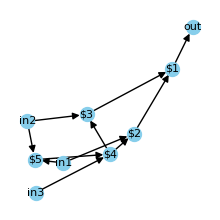

In [9]:
# Path to the JSON file
json_file_path = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input_experimental_demonstration/0x2B/0x2B_outputNetlist.json'


# Load JSON data from file
json_data = load_json_file(json_file_path)

# Create a DAG from the JSON data
dag = create_dag_from_json(json_data)

# Print the nodes and edges in the DAG
print("Nodes in the DAG:")
for node in dag.nodes(data=True):
    print(node)

print("\nEdges in the DAG:")
for edge in dag.edges(data=True):
    print(edge)
    
G = dag

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()      

=== assign_parts_from_json_repressors: changes ===
[detect] inputs:  ['in3', 'in2', 'in1']
[detect] outputs: ['out']
[assign] $1: deviceName='B1_BM3R1' -> RBS='B1', Repressor='BM3R1' (df row 3)
[assign] $2: deviceName='P2_PhlF' -> RBS='P2', Repressor='PhlF' (df row 11)
[assign] $3: deviceName='A1_AmtR' -> RBS='A1', Repressor='AmtR' (df row 1)
[assign] $4: deviceName='R1_PsrA' -> RBS='R1', Repressor='PsrA' (df row 13)
[assign] $5: deviceName='E1_BetI' -> RBS='E1', Repressor='BetI' (df row 2)
[cleanup] $1: removed ['nodeType', 'deviceName']
[cleanup] out: removed ['nodeType', 'deviceName']
[cleanup] $2: removed ['nodeType', 'deviceName']
[cleanup] $3: removed ['nodeType', 'deviceName']
[cleanup] in1: removed ['nodeType', 'deviceName']
[cleanup] $4: removed ['nodeType', 'deviceName']
[cleanup] in2: removed ['nodeType', 'deviceName']
[cleanup] in3: removed ['nodeType', 'deviceName']
[cleanup] $5: removed ['nodeType', 'deviceName']
[relabel] in3 -> 2
[relabel] in2 -> 1
[relabel] in1 -> 0
==

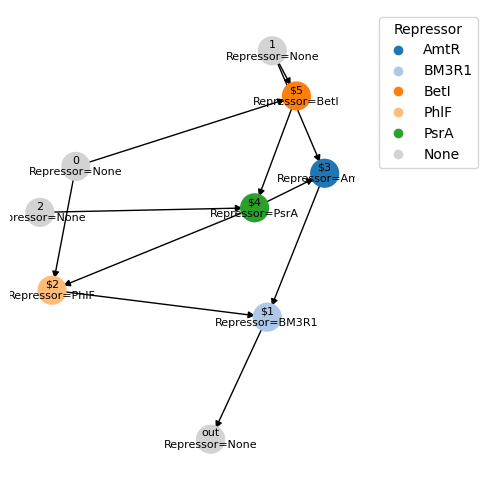

In [10]:
G_assigned = assign_parts_from_json_repressors(G, json_data, cello_v1_hill_function_parameters, topological_sort=False, verbose=True, strict = False)
        
for attr in G_assigned.nodes(data=True):
    print(attr)

topology_plot_with_attrs(G_assigned, seed = 1459)

In [11]:
toxicity_score, toxicity_score_details = cello2_calculate_toxicity_score(
    input_signals_list_small_molecules_3_input,
    G_assigned,
    gate_toxicity_df
)

# Simulate logic
actual_logic = simulate_signal_propagation(
    G_assigned,
    input_signals_list_small_molecules_3_input
)
expected_logic = simulate_signal_propagation_binary(
    G_assigned,
    input_signals_list_binary_3_input
)

# Calculate scores
current_score = calculate_circuit_score(expected_logic, actual_logic)
roadblocking_flag = is_roadblocking(G_assigned)

In [12]:
round(current_score, 2)

4.51

In [13]:
[round(i, 2) for i in toxicity_score_details['multiplied_growth_scores']]

[0.81, 0.79, 0.83, 0.78, 0.83, 0.82, 0.82, 0.76]

In [14]:
round(toxicity_score, 2)

0.76

In [15]:
expected_logic

[{'out': 0},
 {'out': 0},
 {'out': 1},
 {'out': 0},
 {'out': 1},
 {'out': 0},
 {'out': 1},
 {'out': 1}]

In [16]:
calculate_truth_table_v2(G_assigned)

{(0, 0, 0): (0,),
 (0, 0, 1): (0,),
 (0, 1, 0): (1,),
 (0, 1, 1): (0,),
 (1, 0, 0): (1,),
 (1, 0, 1): (0,),
 (1, 1, 0): (1,),
 (1, 1, 1): (1,)}

#### Code for analyzing a 3-input dataset with default for cellular burden scoring 

In [17]:
folder_path = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input'

In [18]:
cello2_circuit_scores_default_interp = extract_scores(folder_path)
cello2_circuit_scores_default_interp



{'0x26': 89.66,
 '0x3D': 15.27,
 '0x27': 428.13,
 '0x1F': 98.26,
 '0x80': 788.0,
 '0x87': 53.85,
 '0x2B': 4.51,
 '0x7A': 37.04,
 '0x37': 447.11,
 '0x20': 109.01,
 '0x7F': 229.15,
 '0x25': 56.86,
 '0x07': 630.92,
 '0x41': 0.93,
 '0x2A': 276.27,
 '0x60': 2.22,
 '0x3A': 37.61,
 '0x8B': 142.86,
 '0x6F': 22.65,
 '0x29': 1.0,
 '0x40': 674.06,
 '0x43': 90.04,
 '0x19': 86.29,
 '0x1C': 4.22,
 '0x28': 79.06,
 '0x3E': 59.67,
 '0x0D': 178.22,
 '0x06': 1.06,
 '0xE3': 19.7,
 '0x45': 40.74,
 '0x67': 100.73,
 '0x47': 214.25,
 '0x81': 19.98,
 '0x5D': 290.17,
 '0x51': 631.17,
 '0x7D': 46.86,
 '0x1D': 359.59,
 '0x54': 61.26,
 '0x62': 381.67,
 '0x08': 150.39,
 '0x2E': 65.97,
 '0x73': 564.57,
 '0x16': 0.04,
 '0x8A': 277.53,
 '0x10': 413.66,
 '0x04': 87.53,
 '0x6B': 0.84,
 '0x46': 13.94,
 '0x82': 2.65,
 '0x35': 133.73,
 '0x02': 16.79,
 '0x01': 22.11,
 '0x2F': 81.47,
 '0x78': 115.0,
 '0x09': 1.0,
 '0x14': 1.0,
 '0x0B': 607.22,
 '0x15': 294.63,
 '0x71': 45.8,
 '0x4B': 18.19,
 '0x72': 38.32,
 '0x61': 1.0,
 '0x

In [19]:
cello2_tox_scores_default_interp = extract_toxicity_scores(folder_path)
cello2_tox_scores_default_interp

{'0x26': 0.8,
 '0x3D': 0.76,
 '0x27': 0.84,
 '0x1F': 0.84,
 '0x80': 0.85,
 '0x87': 0.77,
 '0x2B': 0.76,
 '0x7A': 0.78,
 '0x37': 0.87,
 '0x20': 0.8,
 '0x7F': 0.86,
 '0x25': 0.75,
 '0x07': 0.87,
 '0x41': 0.72,
 '0x2A': 0.87,
 '0x60': 0.76,
 '0x3A': 0.82,
 '0x8B': 0.76,
 '0x6F': 0.84,
 '0x29': 0.74,
 '0x40': 0.84,
 '0x43': 0.75,
 '0x19': 0.76,
 '0x1C': 0.76,
 '0x28': 0.79,
 '0x3E': 0.76,
 '0x0D': 0.82,
 '0x06': 0.77,
 '0xE3': 0.8,
 '0x45': 0.76,
 '0x67': 0.83,
 '0x47': 0.82,
 '0x81': 0.75,
 '0x5D': 0.87,
 '0x51': 0.81,
 '0x7D': 0.83,
 '0x1D': 0.89,
 '0x54': 0.8,
 '0x62': 0.85,
 '0x08': 0.79,
 '0x2E': 0.82,
 '0x73': 0.89,
 '0x16': 0.76,
 '0x8A': 0.87,
 '0x10': 0.75,
 '0x04': 0.77,
 '0x6B': 0.75,
 '0x46': 0.81,
 '0x82': 0.76,
 '0x35': 0.79,
 '0x02': 0.77,
 '0x01': 0.76,
 '0x2F': 0.9,
 '0x78': 0.76,
 '0x09': 0.75,
 '0x14': 0.77,
 '0x0B': 0.81,
 '0x15': 0.79,
 '0x71': 0.83,
 '0x4B': 0.83,
 '0x72': 0.84,
 '0x61': 0.72,
 '0x76': 0.78,
 '0x7E': 0.75,
 '0x85': 0.77,
 '0x2D': 0.76,
 '0x57': 0.85,


In [20]:
cell_designs_gates_assigned = {}
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith("_outputNetlist.json"):
            full_path = os.path.join(root, file)
            print(f"Processing file: {full_path}")  # Print the file being processed
            data = load_json_file(full_path)
            graph = create_dag_from_json(data)
            
            nodes_with_no_incoming_edges = [n for n in graph.nodes() if graph.in_degree(n) == 0]
            
            if len(nodes_with_no_incoming_edges) != 3:
                print("[INFO] Design does not have 3 inputs")
                continue
            
            try:
                graph_parts_assigned = assign_parts_from_json_repressors(graph, data, cello_v1_hill_function_parameters, topological_sort=False, verbose=False, strict=True)
            except ValueError:
                print("Value Error")
                continue
            except Exception as e:
                print(f"[ERROR] Unexpected error while assigning parts: {e}")
                continue           
            
            # Use the directory name as the key for the graph
            dir_name = os.path.basename(root)
            #topology_plot_with_attrs(graph_parts_assigned, seed = 1459)
            cell_designs_gates_assigned[dir_name] = graph_parts_assigned

Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x26/0x26_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x3D/0x3D_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x27/0x27_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x1F/0x1F_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x80/0x80_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs_3_input/0x4D/0x4D_outputNetlist.jso

In [21]:
print(len(cell_designs_gates_assigned))
cell_designs_gates_assigned

79


{'0x26': <networkx.classes.digraph.DiGraph at 0x7f8e5c358ac0>,
 '0x3D': <networkx.classes.digraph.DiGraph at 0x7f8c05c331c0>,
 '0x27': <networkx.classes.digraph.DiGraph at 0x7f8c05c4c4c0>,
 '0x1F': <networkx.classes.digraph.DiGraph at 0x7f8c0de609a0>,
 '0x80': <networkx.classes.digraph.DiGraph at 0x7f8c0de5fca0>,
 '0x87': <networkx.classes.digraph.DiGraph at 0x7f8c0deba970>,
 '0x2B': <networkx.classes.digraph.DiGraph at 0x7f8c05c33670>,
 '0x7A': <networkx.classes.digraph.DiGraph at 0x7f8c0de52d30>,
 '0x37': <networkx.classes.digraph.DiGraph at 0x7f8c05c95ca0>,
 '0x20': <networkx.classes.digraph.DiGraph at 0x7f8c05c21040>,
 '0x7F': <networkx.classes.digraph.DiGraph at 0x7f8c0dd26640>,
 '0x25': <networkx.classes.digraph.DiGraph at 0x7f8c0de60100>,
 '0x07': <networkx.classes.digraph.DiGraph at 0x7f8c0de5f100>,
 '0x41': <networkx.classes.digraph.DiGraph at 0x7f8c05c33610>,
 '0x2A': <networkx.classes.digraph.DiGraph at 0x7f8c0dd22e50>,
 '0x60': <networkx.classes.digraph.DiGraph at 0x7f8c0de

0x26, 89.66, 89.66
0x3D, 15.27, 15.27
0x27, 428.13, 428.13
0x1F, 98.26, 98.26
0x80, 788.0, 788.0
0x87, 53.85, 53.85
0x2B, 4.51, 4.51
0x7A, 37.04, 37.04
0x37, 447.11, 447.11
0x20, 109.01, 109.01
0x7F, 229.15, 229.15
0x25, 56.86, 0.02
0x07, 630.92, 630.92
0x41, 0.93, 0.93
0x2A, 276.27, 276.27
0x60, 2.22, 2.22
0x3A, 37.61, 37.61
0x8B, 142.86, 142.86
0x6F, 22.65, 22.65
0x29, 1.0, 1.0
0x40, 674.06, 674.06
0x43, 90.04, 0.01
0x19, 86.29, 0.01
0x1C, 4.22, 4.22
0x28, 79.06, 79.06
0x3E, 59.67, 0.87
0x0D, 178.22, 178.22
0x06, 1.06, 1.06
0xE3, 19.7, 19.7
0x45, 40.74, 40.74
0x67, 100.73, 0.64
0x47, 214.25, 214.25
0x81, 19.98, 0.04
0x5D, 290.17, 290.17
0x51, 631.17, 631.17
0x7D, 46.86, 46.86
0x1D, 359.59, 359.59
0x54, 61.26, 61.26
0x62, 381.67, 381.67
0x08, 150.39, 150.39
0x2E, 65.97, 65.97
0x73, 564.57, 564.57
0x16, 0.04, 0.08
0x8A, 277.53, 277.53
0x10, 413.66, 413.66
0x04, 87.53, 87.53
0x6B, 0.84, 0.91
0x46, 13.94, 13.94
0x82, 2.65, 2.65
0x35, 133.73, 133.73
0x02, 16.79, 16.79
0x01, 22.11, 22.11
0

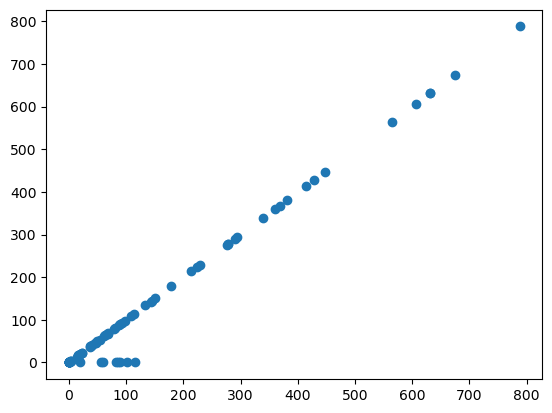

In [22]:
cello_circuit_scores = []
DESIGNR_circuit_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_circuit_hex, cello_circuit_score in cello2_circuit_scores_default_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_circuit_hex].copy()
    except:
        continue
    
    # Simulate logic
    actual_logic = simulate_signal_propagation(
        G_assigned,
        input_signals_list_small_molecules_3_input
    )
    expected_logic = simulate_signal_propagation_binary(
        G_assigned,
        input_signals_list_binary_3_input
    )

    # Calculate scores
    DESIGNR_circuit_score =  round(calculate_circuit_score(expected_logic, actual_logic), 2)

    print(f"{cello_circuit_hex}, {cello_circuit_score}, {DESIGNR_circuit_score}")
    
    cello_circuit_scores.append(cello_circuit_score)
    DESIGNR_circuit_scores.append(DESIGNR_circuit_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_circuit_score, 2) == DESIGNR_circuit_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_circuit_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_circuit_scores, DESIGNR_circuit_scores)
plt.show()

0x26, 0.8, 0.8
0x3D, 0.76, 0.76
0x27, 0.84, 0.84
0x1F, 0.84, 0.84
0x80, 0.85, 0.85
0x87, 0.77, 0.77
0x2B, 0.76, 0.76
0x7A, 0.78, 0.78
0x37, 0.87, 0.87
0x20, 0.8, 0.8
0x7F, 0.86, 0.86
0x25, 0.75, 0.75
0x07, 0.87, 0.87
0x41, 0.72, 0.72
0x2A, 0.87, 0.87
0x60, 0.76, 0.76
0x3A, 0.82, 0.82
0x8B, 0.76, 0.76
0x6F, 0.84, 0.84
0x29, 0.74, 0.74
0x40, 0.84, 0.84
0x43, 0.75, 0.75
0x19, 0.76, 0.76
0x1C, 0.76, 0.76
0x28, 0.79, 0.79
0x3E, 0.76, 0.76
0x0D, 0.82, 0.82
0x06, 0.77, 0.77
0xE3, 0.8, 0.8
0x45, 0.76, 0.76
0x67, 0.83, 0.83
0x47, 0.82, 0.82
0x81, 0.75, 0.75
0x5D, 0.87, 0.87
0x51, 0.81, 0.81
0x7D, 0.83, 0.83
0x1D, 0.89, 0.89
0x54, 0.8, 0.8
0x62, 0.85, 0.85
0x08, 0.79, 0.79
0x2E, 0.82, 0.82
0x73, 0.89, 0.89
0x16, 0.76, 0.76
0x8A, 0.87, 0.87
0x10, 0.75, 0.75
0x04, 0.77, 0.77
0x6B, 0.75, 0.75
0x46, 0.81, 0.81
0x82, 0.76, 0.76
0x35, 0.79, 0.79
0x02, 0.77, 0.77
0x01, 0.76, 0.76
0x2F, 0.9, 0.9
0x78, 0.76, 0.76
0x09, 0.75, 0.75
0x14, 0.77, 0.77
0x0B, 0.81, 0.81
0x15, 0.79, 0.79
0x71, 0.83, 0.83
0x4B, 0

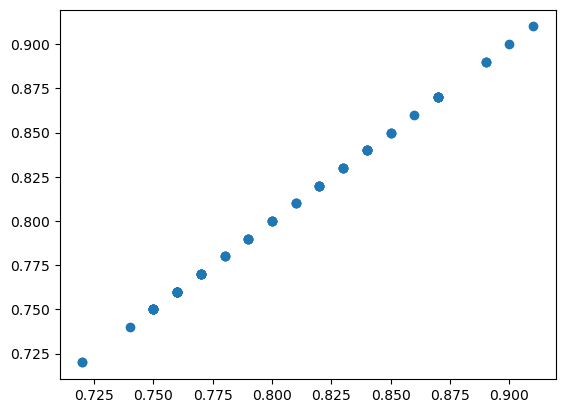

In [23]:
cello_tox_scores = []
DESIGNR_tox_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_tox_hex, cello_tox_score in cello2_tox_scores_default_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_tox_hex].copy()
    except:
        continue
    
    toxicity_score, _ = cello2_calculate_toxicity_score(
        input_signals_list_small_molecules_3_input,
        G_assigned,
        gate_toxicity_df
    )


    # Calculate scores
    DESIGNR_tox_score =  round(toxicity_score, 2)

    print(f"{cello_tox_hex}, {cello_tox_score}, {DESIGNR_tox_score}")
    
    cello_tox_scores.append(cello_tox_score)
    DESIGNR_tox_scores.append(DESIGNR_tox_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_tox_score, 2) == DESIGNR_tox_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_tox_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_tox_scores, DESIGNR_tox_scores)
plt.show()

In [24]:
#stop

#### Code for analyzing a 3-input dataset with log interpolation for cellular burden scoring 

Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0x5C/0x5C_outputNetlist.json
Value Error
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0x7B/0x7B_outputNetlist.json
Value Error
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0x65/0x65_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0xDF/0xDF_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological ci

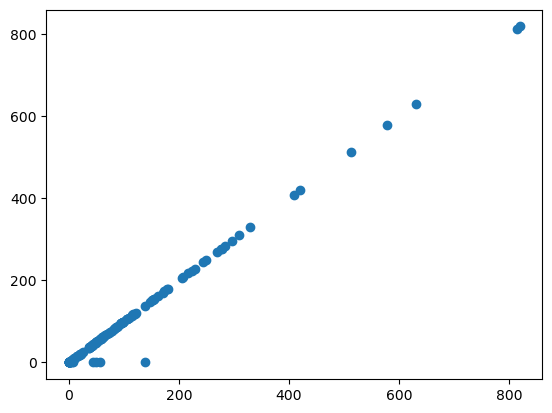

0x65, 0.75, 0.75
0xDF, 0.79, 0.79
0x8E, 0.78, 0.78
0xEB, 0.78, 0.78
0x02, 0.75, 0.75
0xF9, 0.78, 0.78
0xCD, 0.82, 0.82
0x9F, 0.78, 0.78
0x04, 0.82, 0.82
0x34, 0.78, 0.78
0x2A, 0.87, 0.87
0x26, 0.76, 0.76
0x1D, 0.78, 0.78
0xEF, 0.79, 0.79
0x2E, 0.75, 0.75
0xD5, 0.95, 0.95
0x57, 0.84, 0.84
0x7E, 0.75, 0.75
0x75, 0.87, 0.87
0x90, 0.77, 0.77
0x7A, 0.77, 0.77
0xBC, 0.78, 0.78
0x6F, 0.78, 0.78
0xCA, 0.76, 0.76
0x9A, 0.76, 0.76
0xF4, 0.76, 0.76
0xDA, 0.78, 0.78
0x51, 0.8, 0.8
0xEA, 0.87, 0.87
0x27, 0.8, 0.8
0x2B, 0.75, 0.75
0x15, 0.76, 0.76
0x47, 0.79, 0.79
0x8C, 0.85, 0.85
0x07, 0.82, 0.82
0x35, 0.76, 0.76
0x20, 0.77, 0.77
0xF6, 0.76, 0.76
0xCB, 0.78, 0.78
0x56, 0.76, 0.76
0xFD, 0.76, 0.76
0x60, 0.76, 0.76
0xB2, 0.75, 0.75
0xB8, 0.76, 0.76
0x54, 0.87, 0.87
0x62, 0.82, 0.82
0x8D, 0.8, 0.8
0xC4, 0.76, 0.76
0xC7, 0.84, 0.84
0x8B, 0.75, 0.75
0xA2, 0.81, 0.81
0xF1, 0.84, 0.84
0xA6, 0.79, 0.79
0x63, 0.75, 0.75
0xC8, 0.76, 0.76
0xD7, 0.76, 0.76
0x70, 0.87, 0.87
0x72, 0.8, 0.8
0xBF, 0.76, 0.76
0xFB,

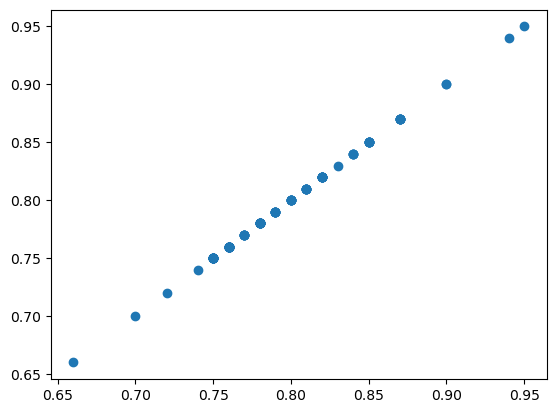

In [25]:
folder_path = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)'

cello2_circuit_scores_log_interp = extract_scores(folder_path)

cello2_tox_scores_log_interp = extract_toxicity_scores(folder_path)

cell_designs_gates_assigned = {}
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith("_outputNetlist.json"):
            full_path = os.path.join(root, file)
            print(f"Processing file: {full_path}")  # Print the file being processed
            data = load_json_file(full_path)
            graph = create_dag_from_json(data)
            
            nodes_with_no_incoming_edges = [n for n in graph.nodes() if graph.in_degree(n) == 0]
            
            if len(nodes_with_no_incoming_edges) != 3:
                print("[INFO] Design does not have 3 inputs")
                continue
            
            try:
                graph_parts_assigned = assign_parts_from_json_repressors(graph, data, cello_v1_hill_function_parameters, topological_sort=False, verbose=False, strict=True)
            except ValueError:
                print("Value Error")
                continue
            except Exception as e:
                print(f"[ERROR] Unexpected error while assigning parts: {e}")
                continue           
            
            # Use the directory name as the key for the graph
            dir_name = os.path.basename(root)
            #topology_plot_with_attrs(graph_parts_assigned, seed = 1459)
            cell_designs_gates_assigned[dir_name] = graph_parts_assigned

cello_circuit_scores = []
DESIGNR_circuit_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_circuit_hex, cello_circuit_score in cello2_circuit_scores_log_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_circuit_hex].copy()
    except:
        continue
    
    # Simulate logic
    actual_logic = simulate_signal_propagation(
        G_assigned,
        input_signals_list_small_molecules_3_input
    )
    expected_logic = simulate_signal_propagation_binary(
        G_assigned,
        input_signals_list_binary_3_input
    )

    # Calculate scores
    DESIGNR_circuit_score =  round(calculate_circuit_score(expected_logic, actual_logic), 2)

    print(f"{cello_circuit_hex}, {cello_circuit_score}, {DESIGNR_circuit_score}")
    
    cello_circuit_scores.append(cello_circuit_score)
    DESIGNR_circuit_scores.append(DESIGNR_circuit_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_circuit_score, 2) == DESIGNR_circuit_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_circuit_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_circuit_scores, DESIGNR_circuit_scores)
plt.show()

cello_tox_scores = []
DESIGNR_tox_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_tox_hex, cello_tox_score in cello2_tox_scores_log_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_tox_hex].copy()
    except:
        continue
    
    toxicity_score, toxicity_score_details = calculate_toxicity_score(
        input_signals_list_small_molecules_3_input,
        G_assigned,
        gate_toxicity_df
    )


    # Calculate scores
    DESIGNR_tox_score =  round(toxicity_score, 2)

    print(f"{cello_tox_hex}, {cello_tox_score}, {DESIGNR_tox_score}")
    
    cello_tox_scores.append(cello_tox_score)
    DESIGNR_tox_scores.append(DESIGNR_tox_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_tox_score, 2) == DESIGNR_tox_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_tox_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_tox_scores, DESIGNR_tox_scores)
plt.show()

#### Code for analyzing a 4-input dataset with log interpolation for cellular burden scoring 

In [26]:
folder_path = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs'

In [27]:
cello2_circuit_scores_default_interp = extract_scores(folder_path, require_inputs=4)
cello2_circuit_scores_default_interp



{'0x1CBF_V2': 1.0,
 '0x00EF_V2': 8.55,
 '0xE677_V2': 0.12,
 '0x00DF_V2': 15.12,
 '0x000D_V2': 1.0,
 '0xF43F_V2': 0.33,
 '0x6F2A_V2': 0.1,
 '0x0D0F_V2': 25.51,
 '0x558F_V2': 1.0,
 '0x9591_V2': 0.47,
 '0xD550_V2': 1.0,
 '0xB744_V2': 0.54,
 '0x240F_V2': 0.74,
 '0x70EC_V2': 0.46,
 '0xCB82_V2': 1.0,
 '0x9917_V2': 0.38,
 '0x5B30_V2': 0.64,
 '0x918A_V2': 0.87,
 '0x0575_V2': 11.51,
 '0x2A56_V2': 0.65,
 '0x1323_V2': 0.59,
 '0x0069_V2': 0.01,
 '0x0068_V2': 0.23}

In [28]:
cello2_tox_scores_default_interp = extract_toxicity_scores(folder_path, require_inputs=4)
cello2_tox_scores_default_interp

{'0x1CBF_V2': 0.66,
 '0x00EF_V2': 0.76,
 '0xE677_V2': 0.7,
 '0x00DF_V2': 0.84,
 '0x000D_V2': 0.75,
 '0xF43F_V2': 0.72,
 '0x6F2A_V2': 0.77,
 '0x0D0F_V2': 0.77,
 '0x558F_V2': 0.75,
 '0x9591_V2': 0.69,
 '0xD550_V2': 0.76,
 '0xB744_V2': 0.65,
 '0x240F_V2': 0.56,
 '0x70EC_V2': 0.71,
 '0xCB82_V2': 0.55,
 '0x9917_V2': 0.53,
 '0x5B30_V2': 0.58,
 '0x918A_V2': 0.54,
 '0x0575_V2': 0.8,
 '0x2A56_V2': 0.55,
 '0x1323_V2': 0.61,
 '0x0069_V2': 0.5,
 '0x0068_V2': 0.57}

In [29]:
cell_designs_gates_assigned = {}
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith("_outputNetlist.json"):
            full_path = os.path.join(root, file)
            print(f"Processing file: {full_path}")  # Print the file being processed
            data = load_json_file(full_path)
            graph = create_dag_from_json(data)
            
            nodes_with_no_incoming_edges = [n for n in graph.nodes() if graph.in_degree(n) == 0]
            
            if len(nodes_with_no_incoming_edges) != 4:
                print("[INFO] Design does not have 4 inputs")
                continue
            
            try:
                graph_parts_assigned = assign_parts_from_json_repressors(graph, data, cello_v1_hill_function_parameters, topological_sort=False, verbose=False, strict=True)
            except ValueError:
                print("Value Error")
                continue
            except Exception as e:
                print(f"[ERROR] Unexpected error while assigning parts: {e}")
                continue           
            
            # Use the directory name as the key for the graph
            dir_name = os.path.basename(root)
            #topology_plot_with_attrs(graph_parts_assigned, seed = 1459)
            cell_designs_gates_assigned[dir_name] = graph_parts_assigned

Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0x23CF_V2/0x23CF_V2_outputNetlist.json
Value Error
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0x1CBF_V2/0x1CBF_V2_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0x41A2_V2/0x41A2_V2_outputNetlist.json
Value Error
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0x00EF_V2/0x00EF_V2_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0xE677_V2/0xE677_V2_outputNetlist.json
Processing file: /home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/data/Cello_2_designs/0

In [30]:
len(graph_parts_assigned)

16

0x1CBF_V2, 1.0, 1.0
0x00EF_V2, 8.55, 8.55
0xE677_V2, 0.12, 0.12
0x00DF_V2, 15.12, 15.12
0x000D_V2, 1.0, 1.0
0xF43F_V2, 0.33, 0.33
0x6F2A_V2, 0.1, 0.1
0x0D0F_V2, 25.51, 25.51
0x558F_V2, 1.0, 1.0
0x9591_V2, 0.47, 0.47
0xD550_V2, 1.0, 1.0
0xB744_V2, 0.54, 0.54
0x240F_V2, 0.74, 0.74
0x70EC_V2, 0.46, 0.46
0xCB82_V2, 1.0, 1.0
0x9917_V2, 0.38, 0.38
0x5B30_V2, 0.64, 0.64
0x918A_V2, 0.87, 0.87
0x0575_V2, 11.51, 11.51
0x2A56_V2, 0.65, 0.65
0x1323_V2, 0.59, 0.59
0x0069_V2, 0.01, 0.01
0x0068_V2, 0.23, 0.23
Same to 2 d.p.: 23/23 = 100.00%


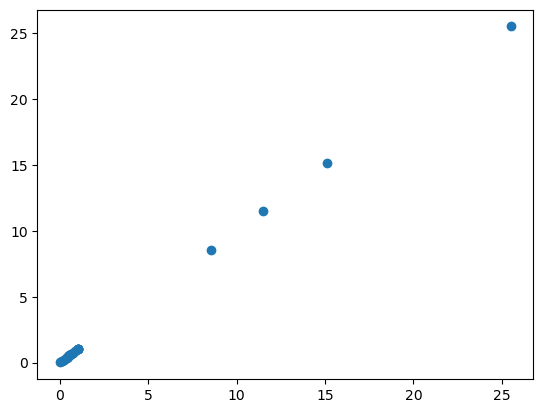

In [31]:
cello_circuit_scores = []
DESIGNR_circuit_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_circuit_hex, cello_circuit_score in cello2_circuit_scores_default_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_circuit_hex].copy()
    except:
        continue
    
    # Simulate logic
    actual_logic = simulate_signal_propagation(
        G_assigned,
        input_signals_list_small_molecules_4_input
    )
    expected_logic = simulate_signal_propagation_binary(
        G_assigned,
        input_signals_list_binary_4_input
    )

    # Calculate scores
    DESIGNR_circuit_score =  round(calculate_circuit_score(expected_logic, actual_logic), 2)

    print(f"{cello_circuit_hex}, {cello_circuit_score}, {DESIGNR_circuit_score}")
    
    cello_circuit_scores.append(cello_circuit_score)
    DESIGNR_circuit_scores.append(DESIGNR_circuit_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_circuit_score, 2) == DESIGNR_circuit_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_circuit_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_circuit_scores, DESIGNR_circuit_scores)
plt.show()

0x1CBF_V2, 0.66, 0.66
0x00EF_V2, 0.76, 0.76
0xE677_V2, 0.7, 0.7
0x00DF_V2, 0.84, 0.84
0x000D_V2, 0.75, 0.75
0xF43F_V2, 0.72, 0.72
0x6F2A_V2, 0.77, 0.77
0x0D0F_V2, 0.77, 0.77
0x558F_V2, 0.75, 0.75
0x9591_V2, 0.69, 0.69
0xD550_V2, 0.76, 0.76
0xB744_V2, 0.65, 0.65
0x240F_V2, 0.56, 0.56
0x70EC_V2, 0.71, 0.71
0xCB82_V2, 0.55, 0.55
0x9917_V2, 0.53, 0.53
0x5B30_V2, 0.58, 0.58
0x918A_V2, 0.54, 0.54
0x0575_V2, 0.8, 0.8
0x2A56_V2, 0.55, 0.55
0x1323_V2, 0.61, 0.61
0x0069_V2, 0.5, 0.5
0x0068_V2, 0.57, 0.57
Same to 2 d.p.: 23/23 = 100.00%


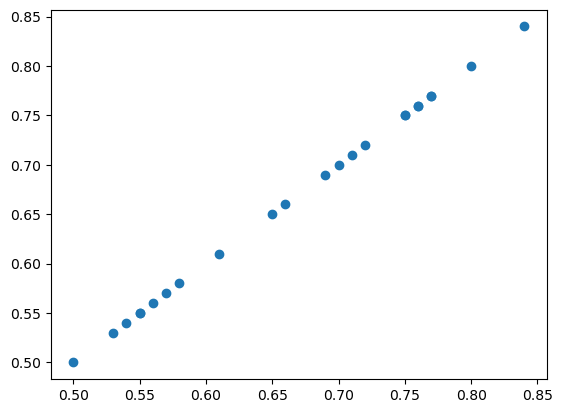

In [32]:
cello_tox_scores = []
DESIGNR_tox_scores = []

num_same = 0
num_total = 0
mismatched_hexes = []

for cello_tox_hex, cello_tox_score in cello2_tox_scores_default_interp.items():
    
    try:
        G_assigned = cell_designs_gates_assigned[cello_tox_hex].copy()
    except:
        continue
    
    toxicity_score, _ = cello2_calculate_toxicity_score(
        input_signals_list_small_molecules_4_input,
        G_assigned,
        gate_toxicity_df
    )


    # Calculate scores
    DESIGNR_tox_score =  round(toxicity_score, 2)

    print(f"{cello_tox_hex}, {cello_tox_score}, {DESIGNR_tox_score}")
    
    cello_tox_scores.append(cello_tox_score)
    DESIGNR_tox_scores.append(DESIGNR_tox_score)
    
    # Compare using 2-decimal precision (to match what's printed)
    num_total += 1
    if round(cello_tox_score, 2) == DESIGNR_tox_score:
        num_same += 1
    else:
        mismatched_hexes.append(cello_tox_hex)

# Summary
if num_total > 0:
    pct_same = 100.0 * num_same / num_total
    print(f"Same to 2 d.p.: {num_same}/{num_total} = {pct_same:.2f}%")
else:
    print("No designs processed.")

# Print the hex IDs that did not match
if mismatched_hexes:
    print("Hex with mismatched scores (2 d.p.):")
    for hx in sorted(mismatched_hexes):
        print(hx)

plt.scatter(cello_tox_scores, DESIGNR_tox_scores)
plt.show()